In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

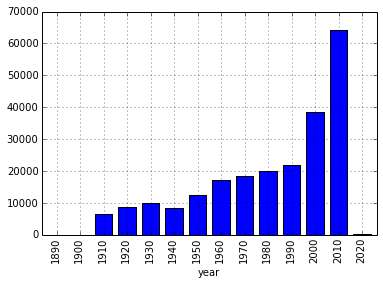

In [47]:
t = titles.groupby([titles.year // 10 * 10])
t.size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

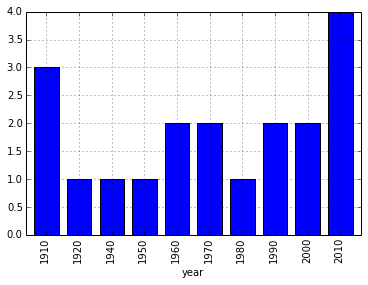

In [48]:
t = titles[titles.title == 'Hamlet']
t.groupby([t.year // 10 * 10]).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [54]:
c = cast
c[(c.n == 1) & (c.year // 10 == 195)].groupby(['year', 'type']).size()

year  type   
1950  actor      617
      actress    278
1951  actor      643
      actress    277
1952  actor      602
      actress    289
1953  actor      654
      actress    296
1954  actor      638
      actress    305
1955  actor      623
      actress    275
1956  actor      635
      actress    298
1957  actor      721
      actress    297
1958  actor      707
      actress    291
1959  actor      701
      actress    310
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [56]:
c = cast
c[(c.year // 10 == 195) & (c.n >= 1) & (c.n <= 5)].groupby(['n','type']).size()

n  type   
1  actor      6541
   actress    2916
2  actor      4497
   actress    4509
3  actor      5518
   actress    3109
4  actor      5519
   actress    2817
5  actor      5544
   actress    2512
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [61]:
c = cast
c[c.title == 'The Pink Panther'].sort('n').groupby('year').n.max()

year
1963    15
2006    50
Name: n, dtype: float64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [64]:
c = cast[cast.name == 'Frank Oz']
a = c.groupby(['year','title']).size()
a[a>1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [69]:
c = cast[cast.name == 'Frank Oz']
a = c.groupby(['character']).size()
a[a>1].order()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64

In [7]:
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [9]:
%%time
cast[cast.title == 'Sleuth']

CPU times: user 489 ms, sys: 9.12 ms, total: 498 ms
Wall time: 672 ms


,title,year,name,type,character,n
243350,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
306143,Sleuth,1972,Michael Caine,actor,Milo Tindle,2
306144,Sleuth,2007,Michael Caine,actor,Andrew,1
350669,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
350670,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1214180,Sleuth,2007,Jude Law,actor,Milo,2
1360231,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6
1375811,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4
1601539,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1
1695799,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3


In [11]:
c = cast.set_index(['title'])
c

,year,name,type,character,n
title,,,,,
Suuri illusioni,1985,Homo $,actor,Guests,22
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN
When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8


In [13]:
%%time
c.loc['Sleuth']

CPU times: user 181 ms, sys: 5.03 ms, total: 186 ms
Wall time: 261 ms


,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Michael Caine,actor,Milo Tindle,2
Sleuth,2007,Michael Caine,actor,Andrew,1
Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Jude Law,actor,Milo,2
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1


In [15]:
c = cast.set_index(['title']).sort_index()
c.head()

,year,name,type,character,n
title,,,,,
#1 Serial Killer,2013,Thomas Isao Morinaka,actor,Policeman #1,19
#1 Serial Killer,2013,Michael Alton,actor,Detective Roberts,17
#1 Serial Killer,2013,Jesse Wang,actor,Mr. Tsai,11
#1 Serial Killer,2013,Matthias Chrans,actor,Brian Bennett,13
#1 Serial Killer,2013,Parry Shen,actor,Murder Victim,NaN


In [17]:
%%time
c.loc['Sleuth']

CPU times: user 603 µs, sys: 58 µs, total: 661 µs
Wall time: 626 µs


,year,name,type,character,n
title,,,,,
Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6
Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1
Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
Sleuth,2007,Eve (II) Channing,actress,Marguerite Wyke,NaN
Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4
Sleuth,2007,Michael Caine,actor,Andrew,1
Sleuth,1972,Michael Caine,actor,Milo Tindle,2
Sleuth,2007,Carmel O'Sullivan,actress,Maggie,NaN


In [18]:
c = cast.set_index(['title', 'year']).sort_index()
c.head()

name   type               character   n
title            year                                                      
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21
                 2013  Zachary (X) Brown  actor  Africian American Teen  18
                 2013     Yvis Cannavale  actor            Homeless Man  25
                 2013      Patrick Chien  actor          Cleaver Victim  22

[5 rows x 4 columns]

In [22]:
%%time
c.loc['Sleuth', 1972]

CPU times: user 883 µs, sys: 154 µs, total: 1.04 ms
Wall time: 902 µs


name     type                   character  n
title  year                                                            
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2
       1972      Alec Cawthorne    actor           Inspector Doppler  3
       1972        Teddy Martin    actor      Police Constable Higgs  6
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4
       1972    Laurence Olivier    actor                 Andrew Wyke  1
       1972  Eve (III) Channing  actress             Marguerite Wyke  5

[6 rows x 4 columns]

In [25]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['title','year','character']).size()

title                              year  character               
A Very Murray Christmas            2015  George Clooney              1
Batman & Robin                     1997  Batman                      1
                                         Bruce Wayne                 1
Burn After Reading                 2008  Harry Pfarrer               1
Confessions of a Dangerous Mind    2002  Jim Byrd                    1
Curdled                            1996  Seth Gecko                  1
Fantastic Mr. Fox                  2009  Mr. Fox                     1
From Dusk Till Dawn                1996  Seth Gecko                  1
Good Night, and Good Luck.         2005  Fred Friendly               1
Gravity                            2013  Matt Kowalski               1
Hail, Caesar!                      2016  Baird Whitlock              1
Intolerable Cruelty                2003  Miles                       1
Leatherheads                       2008  Dodge Connelly              1
Michael Cla

In [42]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(c.year // 10 * 10).n.size()

year
1980     2
1990    14
2000    20
2010    11
dtype: int64

In [71]:
c = cast
c.groupby([c.year // 10 * 10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       26886
      actress     15409
1920  actor       47455
      actress     23378
1930  actor      149120
      actress     48792
1940  actor      159726
      actress     50652
1950  actor      153254
      actress     55736
1960  actor      128249
      actress     55027
1970  actor      146495
      actress     63566
1980  actor      190922
      actress     88188
1990  actor      256040
      actress    121242
2000  actor      481756
      actress    259455
2010  actor      636080
      actress    355799
2020  actor         103
      actress        54
dtype: int64

In [ ]:
c = cast
c c[]
c.head()